# Batch size

## What are batches

Machine learning models are usually trained on batches of data. A batch is simply a number (usually the power of 2), that a model trains itself on in an iteration. For example, batch size 32 means that the model takes in these 32 entries of data, averaging its output, and trains on the 32 labels of the entires.

## Batch size too small

When batch sizes are too small, there are several issues that we may encounter.

### Training takes a long time.

When training on GPUs, data is sent to the GPU batch by batch, with the overhead of transfering data back and forth. If the batch size is too small, we spend a much higher percentage of time sending data than actually computing. This is the reason we usually prefer bigger batches.

### The training does not converge.

In probability theory, variance measures how much the input varies, how close on average are two inputs. Let's plot two distributions with different variances. 

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

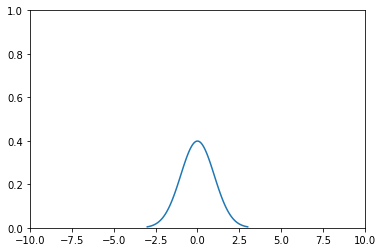

In [2]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.xlim(-10, 10)
plt.ylim(0, 1)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

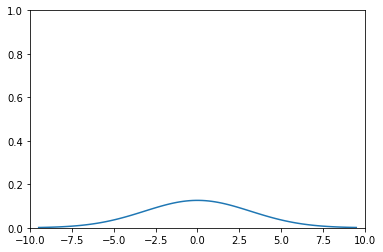

In [3]:
mu = 0
variance = 10
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.xlim(-10, 10)
plt.ylim(0, 1)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

See how the first distribution is narrower than the second distribution. That means, the number sampled (numbers yielded from) the distribution is closer to one another, and changes little. A smaller variance helps the machine learning model to learn faster, because it's easier to learn from a simpler input than from inputs that can change a lot. For that reason, averages are easier to learn than individuals.

## Batch size too big

### Training takes a lot of time.

When batch size is too big, trainig can also take a long time, but for different reasons. It's again related to variance.

There are certain problems in machine learning that gradients can be small, close to 0. In such a case, when the batch is overly big, the gradients can average so close to zero that it hinders progress of convergence. Well, worry not! Most of us aren't rich enough to use those kind of batch sizes (because of expensive GPUs).

## So, how should I choose batch sizes?

Batch sizes are very tricky. Both too big and too small can make training very slow. So make sure to try different batch sizes and observe before commiting to training the whole dataset.